In [1]:
import os
import sys
sys.path.append("../..")
import phage_init

In [2]:
#load the saved matrices
import pickle
train_X_total=pickle.load(open( os.path.join(phage_init.data_dir,"train_x_data2_full.p"), "rb" ) )
test_X_total=pickle.load(open( os.path.join(phage_init.data_dir,"test_x_data2_full.p"), "rb" ) )
train_Y=pickle.load(open( os.path.join(phage_init.data_dir,"train_y_data2_full.p"), "rb" ) )
test_Y=pickle.load(open( os.path.join(phage_init.data_dir,"test_y_data2_full.p"), "rb" ) )
mean_total=pickle.load(open( os.path.join(phage_init.data_dir,"mean_data2_full.p"), "rb" ) )
std_total=pickle.load(open( os.path.join(phage_init.data_dir,"std_data2_full.p"), "rb" ) )

In [3]:
di_train     = train_X_total[:,0:400]
tri_train    = train_X_total[:,400:8400]
di_sc_train  = train_X_total[:,8400:8449] 
tri_sc_train = train_X_total[:,8449:8792]
tt_train     = train_X_total[:,8792:]

In [4]:
di_test     = test_X_total[:,0:400]
tri_test    = test_X_total[:,400:8400]
di_sc_test  = test_X_total[:,8400:8449] 
tri_sc_test = test_X_total[:,8449:8792]
tt_test     = test_X_total[:,8792:]

In [5]:
mean_di     = mean_total[0:400]
mean_tri    = mean_total[400:8400]
mean_di_sc  = mean_total[8400:8449] 
mean_tri_sc = mean_total[8449:8792]
mean_tt     = mean_total[8792:]

In [6]:
std_di     = std_total[0:400]
std_tri    = std_total[400:8400]
std_di_sc  = std_total[8400:8449] 
std_tri_sc = std_total[8449:8792]
std_tt     = std_total[8792:]

In [7]:
#import keras and numpy
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout
from keras.optimizers import Adam
from keras.models import load_model

Using TensorFlow backend.


In [8]:
#print(di_train.shape)
print(tt_train.shape)
#train_X =numpy.concatenate((tri_sc_train,tt_train),axis=1)
#test_X  =numpy.concatenate((tri_sc_test,tt_test),axis=1)
#train_X=di_train
#test_X=di_test
train_X=train_X_total
test_X=test_X_total
model_name='all_data2.h5'
print(train_X.shape)
print(test_X.shape)

(50000, 8)
(50000, 8800)
(7774, 8800)


In [9]:
#this list the devices, just making sure there is a GPU present, you might be fine with no GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15684801094468083982
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 17199531766262031594
physical_device_desc: "device: XLA_CPU device"
]


In [10]:
model_name='all_data2.h5'
model = load_model( os.path.join(phage_init.model_dir,model_name) )

In [11]:
scores = model.evaluate(test_X, test_Y, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

7774/7774 [==============================] - 10s 1ms/step
Accuracy: 91.47%


In [12]:
from sklearn.metrics import classification_report


test_Y_index = test_Y.argmax(axis=1) # Convert one-hot to index
test_Y_predicted = model.predict_classes(test_X)
labels_names=["Major capsid","Minor capsid","Baseplate","Major tail","Minor tail","Portal","Tail fiber",
             "Tail shaft","Collar","Head-Tail joining"]
print(classification_report(test_Y_index, test_Y_predicted, target_names=labels_names ))
#print (test_Y_index)

                   precision    recall  f1-score   support

     Major capsid       0.94      0.95      0.95      1836
     Minor capsid       0.74      0.56      0.64       105
        Baseplate       0.92      0.85      0.89       308
       Major tail       0.88      0.92      0.90       423
       Minor tail       0.87      0.82      0.85       499
           Portal       0.94      0.96      0.95      2473
       Tail fiber       0.78      0.77      0.78       412
       Tail shaft       0.93      0.94      0.93       677
           Collar       0.74      0.73      0.74       149
Head-Tail joining       0.92      0.91      0.92       892

        micro avg       0.91      0.91      0.91      7774
        macro avg       0.87      0.84      0.85      7774
     weighted avg       0.91      0.91      0.91      7774



In [13]:
from collections import Counter
zz=Counter(test_Y_index)
sample_w=[zz[i] for i in range(0,10,1)]
print(zz)
print(sample_w)
print()

Counter({5: 2473, 0: 1836, 9: 892, 7: 677, 4: 499, 3: 423, 6: 412, 2: 308, 8: 149, 1: 105})
[1836, 105, 308, 423, 499, 2473, 412, 677, 149, 892]



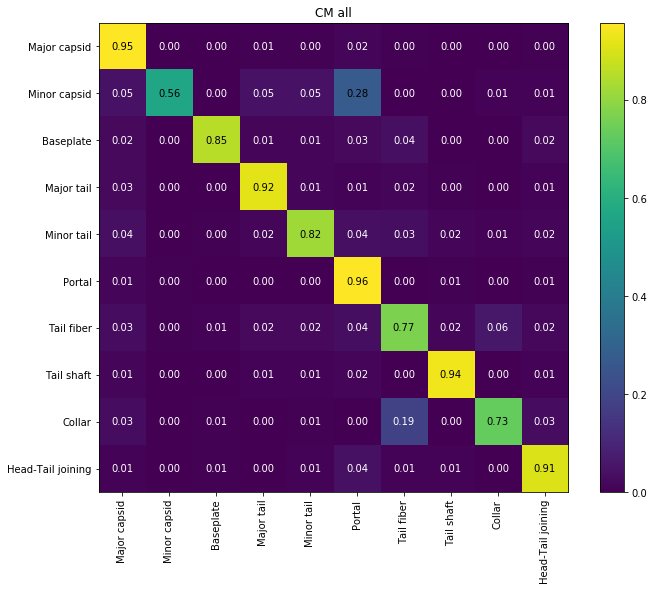

In [15]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
plt.show()
CM=confusion_matrix(test_Y_index, test_Y_predicted)
CM_n=CM/numpy.array(sample_w)[:,None]
scale_up=1.8
plt.figure(figsize=[6.4*scale_up, 4.8*scale_up])
plt.imshow(CM_n, interpolation='nearest')
plt.title('CM all')
plt.colorbar()
tick_marks = numpy.arange(len(labels_names))
plt.xticks(tick_marks, labels_names, rotation=90)
plt.yticks(tick_marks, labels_names)
fmt = '.2f'
for i, j in itertools.product(range(CM_n.shape[0]), range(CM_n.shape[1])):
        plt.text(j, i, format(CM_n[i, j], fmt),horizontalalignment="center",verticalalignment='center',
                color="white" if CM_n[i, j] < 0.25 else "black")
plt.savefig('bigger_better_ann.png',bbox_inches="tight")
plt.show()
